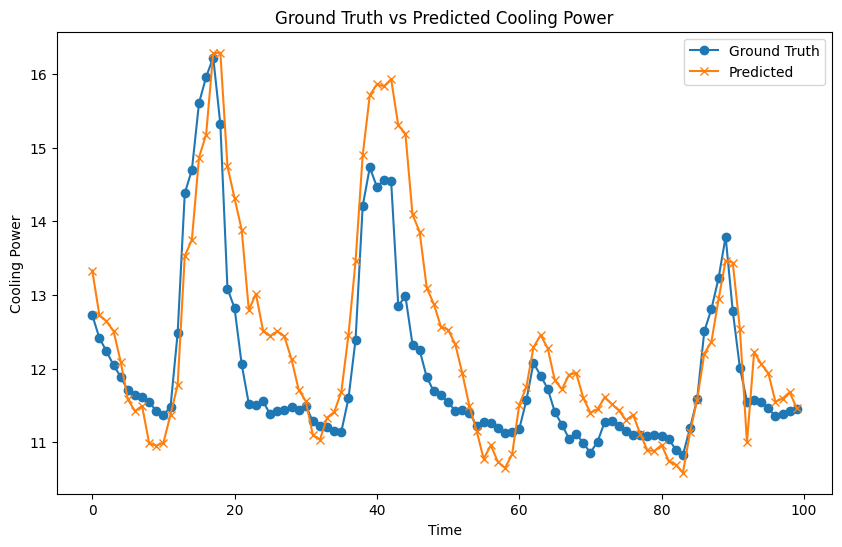

Test MAE: 0.98
Test MAPE: 8.14%
Test RMSE: 1.24


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./Final_1h_Feature Engineering_No Missing.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

# Set timestamp as index (optional for time-series)
data.set_index('timestamp', inplace=True)

# Define features and target
features = data.drop(columns=['cooling_power'])
target = data['cooling_power']

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=(1 - train_size), shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(val_size / (1 - train_size)), shuffle=False)

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mape = np.mean(np.abs((y - predictions) / y)) * 100
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return mae, mape, rmse

# Hyperparameter tuning with Ridge and Lasso regression
best_model = None
best_score = float('inf')

for alpha in [0.01, 0.1, 1, 10, 100]:
    for model_type in [Ridge, Lasso]:
        model = model_type(alpha=alpha)
        model.fit(X_train_scaled, y_train)
        val_mae, val_mape, val_rmse = evaluate_model(model, X_val_scaled, y_val)
        if val_rmse < best_score:
            best_score = val_rmse
            best_model = model

# Final evaluation on test set with the best model
test_mae, test_mape, test_rmse = evaluate_model(best_model, X_test_scaled, y_test)

# Predict test data
predictions_test = best_model.predict(X_test_scaled)

# Plot results
plt.figure(figsize=(20, 6))
plt.plot(y_test.values, label='Ground Truth', marker='o')
plt.plot(predictions_test, label='Predicted', marker='x')
plt.title('Ground Truth vs Predicted Cooling Power')
plt.xlabel('Time')
plt.ylabel('Cooling Power')
plt.legend()
plt.show()

# Evaluation metrics
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test RMSE: {test_rmse:.2f}")



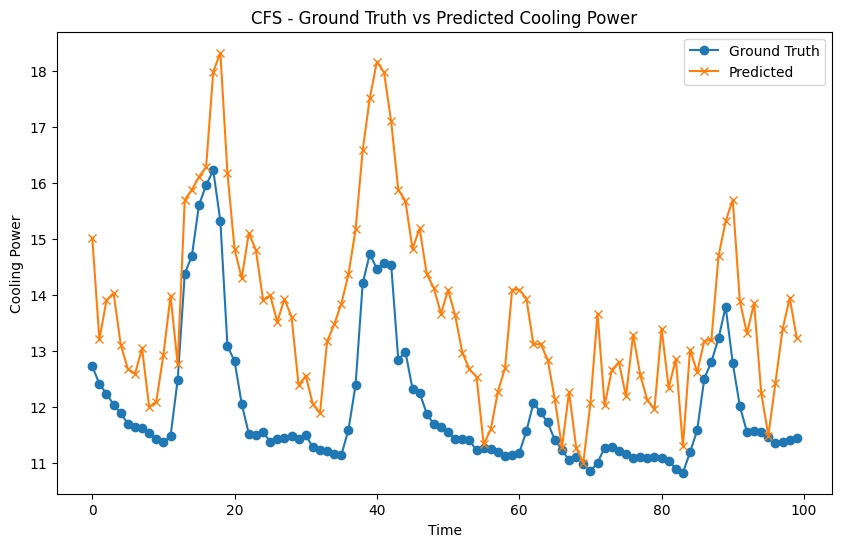

Test MAE: 1.89
Test MAPE: 15.93%
Test RMSE: 2.25


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./CFS_based_feature.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

# Set timestamp as index (optional for time-series)
data.set_index('timestamp', inplace=True)

# Define features and target
features = data.drop(columns=['cooling_power'])
target = data['cooling_power']

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=(1 - train_size), shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(val_size / (1 - train_size)), shuffle=False)

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mape = np.mean(np.abs((y - predictions) / y)) * 100
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return mae, mape, rmse

# Hyperparameter tuning with Ridge and Lasso regression
best_model = None
best_score = float('inf')

for alpha in [0.01, 0.1, 1, 10, 100]:
    for model_type in [Ridge, Lasso]:
        model = model_type(alpha=alpha)
        model.fit(X_train_scaled, y_train)
        val_mae, val_mape, val_rmse = evaluate_model(model, X_val_scaled, y_val)
        if val_rmse < best_score:
            best_score = val_rmse
            best_model = model

# Final evaluation on test set with the best model
test_mae, test_mape, test_rmse = evaluate_model(best_model, X_test_scaled, y_test)

# Predict test data
predictions_test = best_model.predict(X_test_scaled)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Ground Truth', marker='o')
plt.plot(predictions_test[:100], label='Predicted', marker='x')
plt.title('CFS - Ground Truth vs Predicted Cooling Power')
plt.xlabel('Time')
plt.ylabel('Cooling Power')
plt.legend()
plt.show()

# Evaluation metrics
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test RMSE: {test_rmse:.2f}")



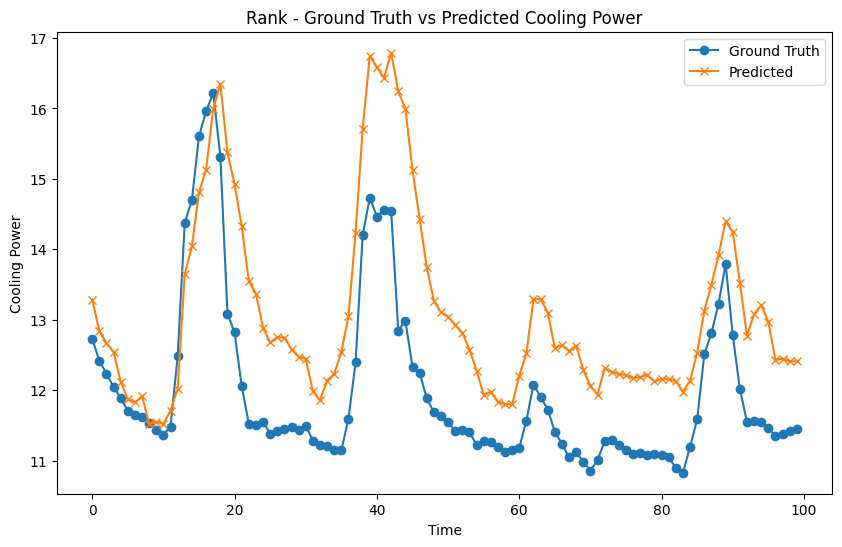

Test MAE: 1.68
Test MAPE: 14.16%
Test RMSE: 1.99


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./Rank_based_feature.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

# Set timestamp as index (optional for time-series)
data.set_index('timestamp', inplace=True)

# Define features and target
features = data.drop(columns=['cooling_power'])
target = data['cooling_power']

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=(1 - train_size), shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(val_size / (1 - train_size)), shuffle=False)

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mae = mean_absolute_error(y, predictions)
    mape = np.mean(np.abs((y - predictions) / y)) * 100
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return mae, mape, rmse

# Hyperparameter tuning with Ridge and Lasso regression
best_model = None
best_score = float('inf')

for alpha in [0.01, 0.1, 1, 10, 100]:
    for model_type in [Ridge, Lasso]:
        model = model_type(alpha=alpha)
        model.fit(X_train_scaled, y_train)
        val_mae, val_mape, val_rmse = evaluate_model(model, X_val_scaled, y_val)
        if val_rmse < best_score:
            best_score = val_rmse
            best_model = model

# Final evaluation on test set with the best model
test_mae, test_mape, test_rmse = evaluate_model(best_model, X_test_scaled, y_test)

# Predict test data
predictions_test = best_model.predict(X_test_scaled)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Ground Truth', marker='o')
plt.plot(predictions_test[:100], label='Predicted', marker='x')
plt.title('Rank - Ground Truth vs Predicted Cooling Power')
plt.xlabel('Time')
plt.ylabel('Cooling Power')
plt.legend()
plt.show()

# Evaluation metrics
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test RMSE: {test_rmse:.2f}")



## ARIMAX, SARIMAX

c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


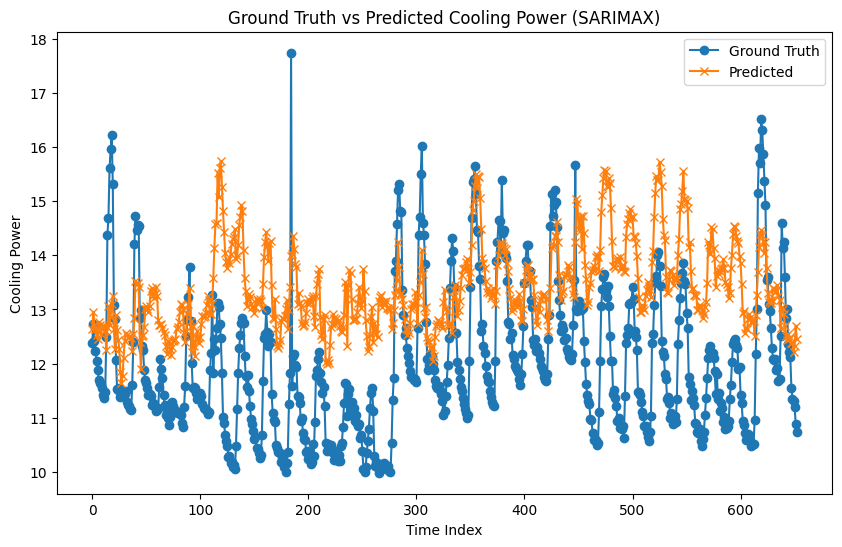

Test MAE: 1.66
Test RMSE: 1.87
Test MAPE: 2.37%


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from itertools import product

# Load the dataset
data = pd.read_csv('./Final_1h_Feature Engineering_No Missing.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

# Set timestamp as index
data.set_index('timestamp', inplace=True)

# Define target and exogenous features
target = data['cooling_power']
exog = data.drop(columns=[ 'Wind_Temperature_Interaction',
       'Wind_humidity_Interaction', 
       'Temp_Difference', 'Humidity_Difference',
       'Rainfall_Humidity_Interaction', 'outside_temperature',
       'outside_humidity', 'wind_speed', 'rainfall', 'inner_temperature',
       'inner_humidity', 'cooling_power'])

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

train_end = int(len(data) * train_size)
val_end = train_end + int(len(data) * val_size)

y_train, y_val, y_test = target[:train_end], target[train_end:val_end], target[val_end:]
exog_train, exog_val, exog_test = exog[:train_end], exog[train_end:val_end], exog[val_end:]

# Hyperparameter tuning for ARIMAX using AIC
best_arimax_order = (1,1,2)
best_arimax_aic = float('inf')

p_values = range(1, 2)
d_values = range(1, 2)
q_values = range(2, 3)

# for order in product(p_values, d_values, q_values):
#     try:
#         model = ARIMA(endog=y_train, exog=exog_train, order=order)
#         model_fit = model.fit()
#         if model_fit.aic < best_arimax_aic:
#             best_arimax_aic = model_fit.aic
#             best_arimax_order = order
#     except Exception as e:
#         continue

# Hyperparameter tuning for SARIMAX using AIC
best_sarimax_order = (1,1,2)
best_sarimax_seasonal_order = (0,0,1,24)
best_sarimax_aic = float('inf')

seasonal_p_values = range(0, 2)
seasonal_d_values = range(0, 1)
seasonal_q_values = range(0, 2)
seasonal_m = [24]
ariam_true=1
if ariam_true==0:
    final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
    model_type = 'ARIMAX'
else:
    final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
    model_type = 'SARIMAX'

final_model_fit = final_model.fit()
#print(exog_test.shape, )
predictions_test = final_model_fit.forecast(steps=len(y_test), exog=exog_test)
# exog_test_aligned = exog_test.loc[y_test.index]
# predictions_test = final_model_fit.predict(
#     start=y_test.index[0],  # Start from the first timestamp in test data
#     end=y_test.index[-1],   # End at the last timestamp in test data
#     exog=exog_test_aligned
# )
#print(predictions_test)
predictions_test_1=predictions_test.reset_index(drop=True)
#print(y_test)
y_test_1=y_test.reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(y_test_1[:].values, marker='o', label='Ground Truth')
plt.plot(predictions_test_1[:], marker='x', label='Predicted')
plt.title(f'Ground Truth vs Predicted Cooling Power ({model_type})')
plt.xlabel('Time Index')
plt.ylabel('Cooling Power')
plt.legend()
plt.show()

# Evaluate final model on test set
test_mae = mean_absolute_error(y_test, predictions_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

print(f"Test MAE: {test_mae:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from itertools import product

# Load the dataset
data = pd.read_csv('./Final_1h_Feature Engineering_No Missing.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

# Set timestamp as index
data.set_index('timestamp', inplace=True)

# Define target and exogenous features
target = data['cooling_power']
exog = data.drop(columns=[ 'Wind_Temperature_Interaction',
       'Wind_humidity_Interaction', 
       'Temp_Difference', 'Humidity_Difference',
       'Rainfall_Humidity_Interaction', 'outside_temperature',
       'outside_humidity', 'wind_speed', 'rainfall', 'inner_temperature',
       'inner_humidity', 'cooling_power'])

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

train_end = int(len(data) * train_size)
val_end = train_end + int(len(data) * val_size)

y_train, y_val, y_test = target[:train_end], target[train_end:val_end], target[val_end:]
exog_train, exog_val, exog_test = exog[:train_end], exog[train_end:val_end], exog[val_end:]

# Hyperparameter tuning for ARIMAX using AIC
best_arimax_order = (1,1,2)
best_arimax_aic = float('inf')

p_values = range(1, 2)
d_values = range(1, 2)
q_values = range(2, 3)

# for order in product(p_values, d_values, q_values):
#     try:
#         model = ARIMA(endog=y_train, exog=exog_train, order=order)
#         model_fit = model.fit()
#         if model_fit.aic < best_arimax_aic:
#             best_arimax_aic = model_fit.aic
#             best_arimax_order = order
#     except Exception as e:
#         continue

# Hyperparameter tuning for SARIMAX using AIC
best_sarimax_order = (1,1,2)
best_sarimax_seasonal_order = (0,0,1,24)
best_sarimax_aic = float('inf')

seasonal_p_values = range(0, 2)
seasonal_d_values = range(0, 1)
seasonal_q_values = range(0, 2)
seasonal_m = [24]

# for order in product(p_values, d_values, q_values):
#     for seasonal_order in product(seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_m):
#         try:
#             model = SARIMAX(endog=y_train, exog=exog_train, order=order, seasonal_order=seasonal_order)
#             model_fit = model.fit(disp=False)
#             if model_fit.aic < best_sarimax_aic:
#                 best_sarimax_aic = model_fit.aic
#                 best_sarimax_order = order
#                 best_sarimax_seasonal_order = seasonal_order
#         except Exception as e:
#             continue

# # Select the best model (ARIMAX or SARIMAX)
# if best_arimax_aic < best_sarimax_aic:
#     final_model = ARIMA(endog=y_train, exog=exog_train, order=best_arimax_order)
#     model_type = 'ARIMAX'
# else:
#     final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
#     model_type = 'SARIMAX'

# final_model_fit = final_model.fit()
# predictions_test = final_model_fit.predict(start=y_test.index[0], end=y_test.index[-1], exog=exog_test)

# # Plot results (first 100 points)
# plt.figure(figsize=(10, 6))
# plt.plot(y_test[:100].values, marker='o', label='Ground Truth')
# plt.plot(predictions_test[:100], marker='x', label='Predicted')
# plt.title(f'Ground Truth vs Predicted Cooling Power ({model_type})')
# plt.xlabel('Time Index')
# plt.ylabel('Cooling Power')
# plt.legend()
# plt.show()

# # Evaluate final model on test set
# test_mae = mean_absolute_error(y_test, predictions_test)
# test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
# test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

# print(f"Test MAE: {test_mae:.2f}")
# print(f"Test RMSE: {test_rmse:.2f}")
# print(f"Test MAPE: {test_mape:.2f}%")


In [47]:
print(best_arimax_order,best_sarimax_order,best_sarimax_seasonal_order)

(1, 1, 2) (1, 1, 2) (0, 0, 0, 24)


c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


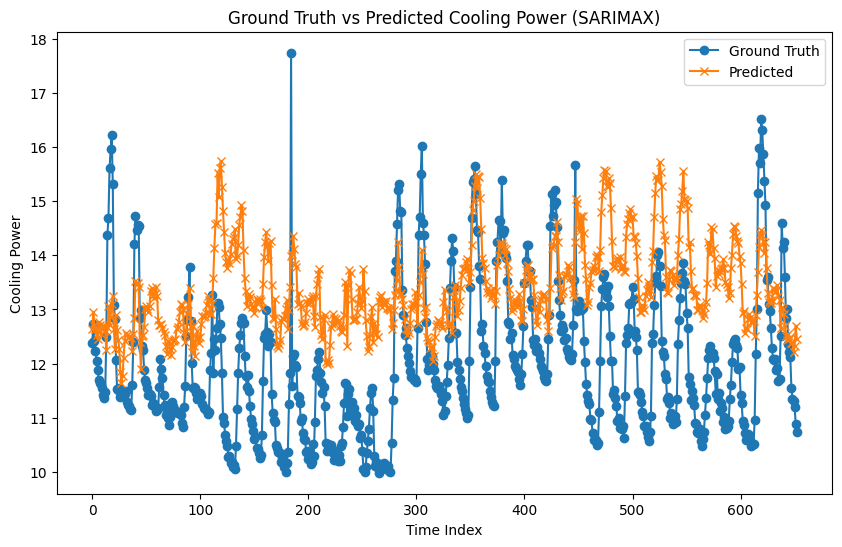

Test MAE: 1.66
Test RMSE: 1.87
Test MAPE: 2.370%


In [4]:
ariam_true=1
if ariam_true==0:
    final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
    model_type = 'ARIMAX'
else:
    final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
    model_type = 'SARIMAX'

final_model_fit = final_model.fit()
#print(exog_test.shape, )
predictions_test = final_model_fit.forecast(steps=len(y_test), exog=exog_test)
# exog_test_aligned = exog_test.loc[y_test.index]
# predictions_test = final_model_fit.predict(
#     start=y_test.index[0],  # Start from the first timestamp in test data
#     end=y_test.index[-1],   # End at the last timestamp in test data
#     exog=exog_test_aligned
# )
#print(predictions_test)
predictions_test_1=predictions_test.reset_index(drop=True)
#print(y_test)
y_test_1=y_test.reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(y_test_1[:].values, marker='o', label='Ground Truth')
plt.plot(predictions_test_1[:], marker='x', label='Predicted')
plt.title(f'Ground Truth vs Predicted Cooling Power ({model_type})')
plt.xlabel('Time Index')
plt.ylabel('Cooling Power')
plt.legend()
plt.show()

# Evaluate final model on test set
test_mae = mean_absolute_error(y_test, predictions_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

print(f"Test MAE: {test_mae:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAPE: {test_mape:.3f}%")

c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


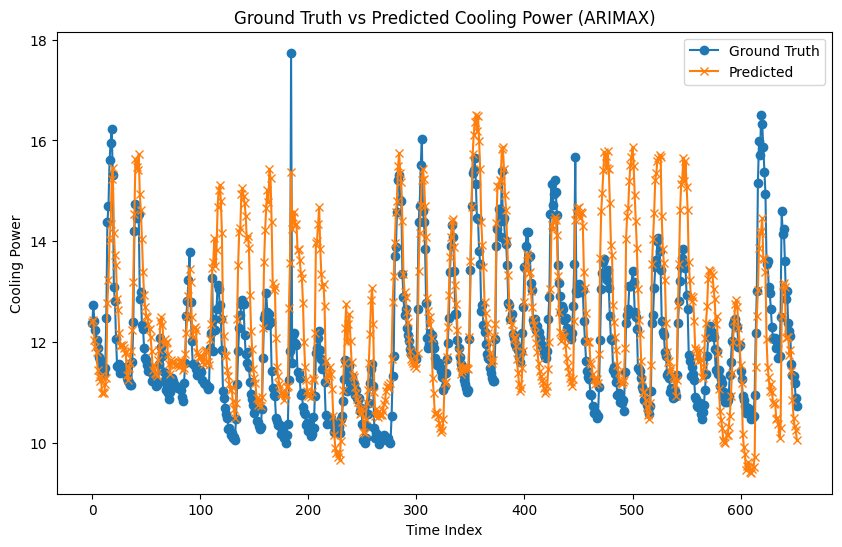

Test MAE: 0.90
Test RMSE: 1.11
Test MAPE: 7.45%


In [ ]:
data = pd.read_csv('./Rank_based_feature.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

# Set timestamp as index
data.set_index('timestamp', inplace=True)

# Define target and exogenous features
target = data['cooling_power']
exog = data.drop(columns=['cooling_power'])

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

train_end = int(len(data) * train_size)
val_end = train_end + int(len(data) * val_size)

y_train, y_val, y_test = target[:train_end], target[train_end:val_end], target[val_end:]
exog_train, exog_val, exog_test = exog[:train_end], exog[train_end:val_end], exog[val_end:]
ariam_true=0
if ariam_true==0:
    final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
    model_type = 'ARIMAX'
else:
    final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
    model_type = 'SARIMAX'

final_model_fit = final_model.fit()
#print(exog_test.shape, )
predictions_test = final_model_fit.forecast(steps=len(y_test), exog=exog_test)
# exog_test_aligned = exog_test.loc[y_test.index]
# predictions_test = final_model_fit.predict(
#     start=y_test.index[0],  # Start from the first timestamp in test data
#     end=y_test.index[-1],   # End at the last timestamp in test data
#     exog=exog_test_aligned
# )
#print(predictions_test)
predictions_test_1=predictions_test.reset_index(drop=True)
#print(y_test)
y_test_1=y_test.reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(y_test_1[:].values, marker='o', label='Ground Truth')
plt.plot(predictions_test_1[:], marker='x', label='Predicted')
plt.title(f'Rank - Ground Truth vs Predicted Cooling Power ({model_type})')
plt.xlabel('Time Index')
plt.ylabel('Cooling Power')
plt.legend()
plt.show()

# Evaluate final model on test set
test_mae = mean_absolute_error(y_test, predictions_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

print(f"Test MAE: {test_mae:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")

In [68]:
data = pd.read_csv('./CFS_based_feature.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

SEED = 12
np.random.seed(SEED)

# Set timestamp as index
data.set_index('timestamp', inplace=True)

# Define target and exogenous features
target = data['cooling_power']
exog = data.drop(columns=['cooling_power'])

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

train_end = int(len(data) * train_size)
val_end = train_end + int(len(data) * val_size)

y_train, y_val, y_test = target[:train_end], target[train_end:val_end], target[val_end:]
exog_train, exog_val, exog_test = exog[:train_end], exog[train_end:val_end], exog[val_end:]

In [71]:
print(y_train.head())
print(y_val.tail())
print(y_test.head())

print(exog_train.head())
print(exog_val.tail())
print(exog_test.head())

timestamp
2022-09-01 00:00:00    14.36350
2022-09-01 01:00:00    14.39562
2022-09-01 02:00:00    14.35788
2022-09-01 03:00:00    14.12362
2022-09-01 04:00:00    14.08128
Name: cooling_power, dtype: float64
timestamp
2023-02-01 14:00:00    15.55075
2023-02-01 15:00:00    15.23413
2023-02-01 16:00:00    15.01653
2023-02-01 17:00:00    13.79815
2023-02-01 18:00:00    12.73655
Name: cooling_power, dtype: float64
timestamp
2023-02-01 19:00:00    12.37399
2023-02-01 20:00:00    12.72792
2023-02-01 21:00:00    12.41611
2023-02-01 22:00:00    12.23583
2023-02-01 23:00:00    12.04438
Name: cooling_power, dtype: float64
                     Wind_humidity_Interaction  Temp_Difference  \
timestamp                                                         
2022-09-01 00:00:00                    172.848          1.89583   
2022-09-01 01:00:00                    125.457          1.78083   
2022-09-01 02:00:00                    100.455          1.81500   
2022-09-01 03:00:00                    145.278 

### CFS-based

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from itertools import product

data = pd.read_csv('./CFS_based_feature.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

SEED = 12
np.random.seed(SEED)

# Set timestamp as index
data.set_index('timestamp', inplace=True)

# Define target and exogenous features
target = data['cooling_power']
exog = data.drop(columns=['cooling_power'])

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

train_end = int(len(data) * train_size)
val_end = train_end + int(len(data) * val_size)

y_train, y_val, y_test = target[:train_end], target[train_end:val_end], target[val_end:]
exog_train, exog_val, exog_test = exog[:train_end], exog[train_end:val_end], exog[val_end:]

best_arimax_order = None
best_arimax_aic = float('inf')
p_values = range(1, 3)
d_values = range(1, 2)
q_values = range(1, 3)

for order in product(p_values, d_values, q_values):
    try:
        model = ARIMA(endog=y_train, exog=exog_train, order=order)
        model_fit = model.fit()
        if model_fit.aic < best_arimax_aic:
            best_arimax_aic = model_fit.aic
            best_arimax_order = order
    except Exception as e:
        continue

# Hyperparameter tuning for SARIMAX using AIC
# best_sarimax_order = None
# best_sarimax_seasonal_order = None
# best_sarimax_aic = float('inf')

# seasonal_p_values = range(0, 2)
# seasonal_d_values = range(0, 2)
# seasonal_q_values = range(0, 2)
# seasonal_m = [24]

# for order in product(p_values, d_values, q_values):
#     for seasonal_order in product(seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_m):
#         try:
#             model = SARIMAX(endog=y_train, exog=exog_train, order=order, seasonal_order=seasonal_order)
#             model_fit = model.fit(disp=False)
#             if model_fit.aic < best_sarimax_aic:
#                 best_sarimax_aic = model_fit.aic
#                 best_sarimax_order = order
#                 best_sarimax_seasonal_order = seasonal_order
#         except Exception as e:
#             continue




c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

In [5]:
p_values = range(1, 3)
d_values = range(1, 2)
q_values = range(1, 3)
best_sarimax_order = None
best_sarimax_seasonal_order = None
best_sarimax_aic = float('inf')

seasonal_p_values = range(0, 2)
seasonal_d_values = range(0, 2)
seasonal_q_values = range(0, 2)
seasonal_m = [24]

for order in product(p_values, d_values, q_values):
    for seasonal_order in product(seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_m):
        try:
            model = SARIMAX(endog=y_train, exog=exog_train, order=order, seasonal_order=seasonal_order)
            model_fit = model.fit(disp=False)
            if model_fit.aic < best_sarimax_aic:
                best_sarimax_aic = model_fit.aic
                best_sarimax_order = order
                best_sarimax_seasonal_order = seasonal_order
        except Exception as e:
            continue

print(best_arimax_order,best_sarimax_order,best_sarimax_seasonal_order)

c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\base\model.py:607: Convergence

(1, 1, 1) (2, 1, 1) (0, 0, 1, 24)


c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


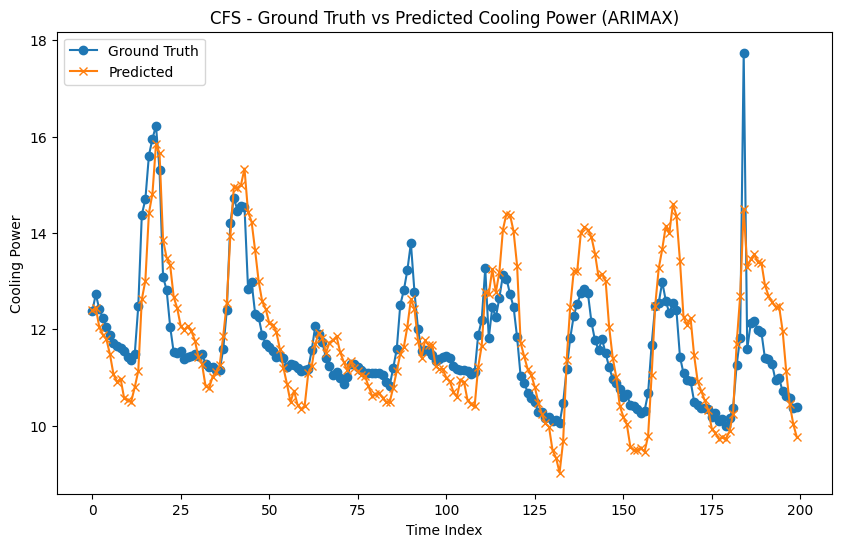

Test MAE: 0.89
Test RMSE: 1.10
Test MAPE: 7.36%
(1, 1, 1) (2, 1, 1) (0, 0, 1, 24)


In [14]:
est_arimax_order,best_sarimax_order,best_sarimax_seasonal_order=(1, 1, 1), (2, 1, 1), (0, 0, 1, 24)
ariam_true=0
if ariam_true==0:
    final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
    model_type = 'ARIMAX'
else:
    final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
    model_type = 'SARIMAX'

final_model_fit = final_model.fit()
#print(exog_test.shape, )
predictions_test = final_model_fit.forecast(steps=len(y_test), exog=exog_test)
# exog_test_aligned = exog_test.loc[y_test.index]
# predictions_test = final_model_fit.predict(
#     start=y_test.index[0],  # Start from the first timestamp in test data
#     end=y_test.index[-1],   # End at the last timestamp in test data
#     exog=exog_test_aligned
# )
#print(predictions_test)

predictions_test_1=predictions_test.reset_index(drop=True)
#print(y_test)
y_test_1=y_test.reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(y_test_1[:200].values, marker='o', label='Ground Truth')
plt.plot(predictions_test_1[:200], marker='x', label='Predicted')
plt.title(f'CFS - Ground Truth vs Predicted Cooling Power ({model_type})')
plt.xlabel('Time Index')
plt.ylabel('Cooling Power')
plt.legend()
plt.show()

# Evaluate final model on test set
test_mae = mean_absolute_error(y_test, predictions_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

print(f"Test MAE: {test_mae:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")

print(best_arimax_order,best_sarimax_order,best_sarimax_seasonal_order)

### Rank-based

In [7]:
data = pd.read_csv('./CFS_based_feature.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

SEED = 12
np.random.seed(SEED)

# Set timestamp as index
data.set_index('timestamp', inplace=True)

# Define target and exogenous features
target = data['cooling_power']
exog = data.drop(columns=['cooling_power'])

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

train_end = int(len(data) * train_size)
val_end = train_end + int(len(data) * val_size)

y_train, y_val, y_test = target[:train_end], target[train_end:val_end], target[val_end:]
exog_train, exog_val, exog_test = exog[:train_end], exog[train_end:val_end], exog[val_end:]

best_arimax_order = None
best_arimax_aic = float('inf')

p_values = range(1, 3)
d_values = range(1, 2)
q_values = range(1, 3)

for order in product(p_values, d_values, q_values):
    try:
        model = ARIMA(endog=y_train, exog=exog_train, order=order)
        model_fit = model.fit()
        if model_fit.aic < best_arimax_aic:
            best_arimax_aic = model_fit.aic
            best_arimax_order = order
    except Exception as e:
        continue

# Hyperparameter tuning for SARIMAX using AIC
best_sarimax_order = None
best_sarimax_seasonal_order = None
best_sarimax_aic = float('inf')

seasonal_p_values = range(0, 1)
seasonal_d_values = range(0, 1)
seasonal_q_values = range(0, 1)
seasonal_m = [24]

for order in product(p_values, d_values, q_values):
    for seasonal_order in product(seasonal_p_values, seasonal_d_values, seasonal_q_values, seasonal_m):
        try:
            model = SARIMAX(endog=y_train, exog=exog_train, order=order, seasonal_order=seasonal_order)
            model_fit = model.fit(disp=False)
            if model_fit.aic < best_sarimax_aic:
                best_sarimax_aic = model_fit.aic
                best_sarimax_order = order
                best_sarimax_seasonal_order = seasonal_order
        except Exception as e:
            continue




c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val

c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\johnl\anaconda3\envs

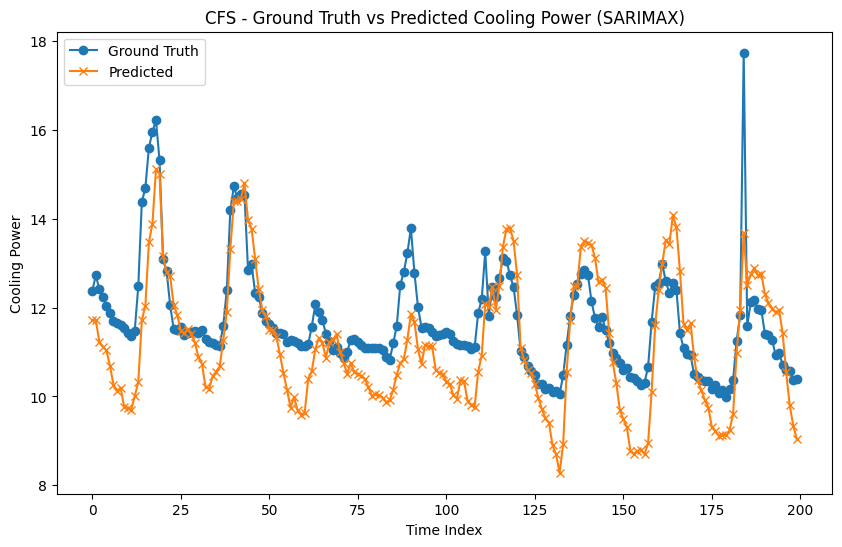

Test MAE: 1.22
Test RMSE: 1.53
Test MAPE: 25.27%
(1, 1, 1) (2, 1, 1) (0, 0, 1, 24)


In [15]:
ariam_true=1
if ariam_true==0:
    final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
    model_type = 'ARIMAX'
else:
    final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
    model_type = 'SARIMAX'

final_model_fit = final_model.fit()
#print(exog_test.shape, )
predictions_test = final_model_fit.forecast(steps=len(y_test), exog=exog_test)
# exog_test_aligned = exog_test.loc[y_test.index]
# predictions_test = final_model_fit.predict(
#     start=y_test.index[0],  # Start from the first timestamp in test data
#     end=y_test.index[-1],   # End at the last timestamp in test data
#     exog=exog_test_aligned
# )
#print(predictions_test)

predictions_test_1=predictions_test.reset_index(drop=True)
#print(y_test)
y_test_1=y_test.reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(y_test_1[:200].values, marker='o', label='Ground Truth')
plt.plot(predictions_test_1[:200], marker='x', label='Predicted')
plt.title(f'CFS - Ground Truth vs Predicted Cooling Power ({model_type})')
plt.xlabel('Time Index')
plt.ylabel('Cooling Power')
plt.legend()
plt.show()

# Evaluate final model on test set
test_mae = mean_absolute_error(y_test, predictions_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

print(f"Test MAE: {test_mae:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")
print(best_arimax_order,best_sarimax_order,best_sarimax_seasonal_order)

### 그냥 해본거

c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\johnl\anaconda3\envs\my_python_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


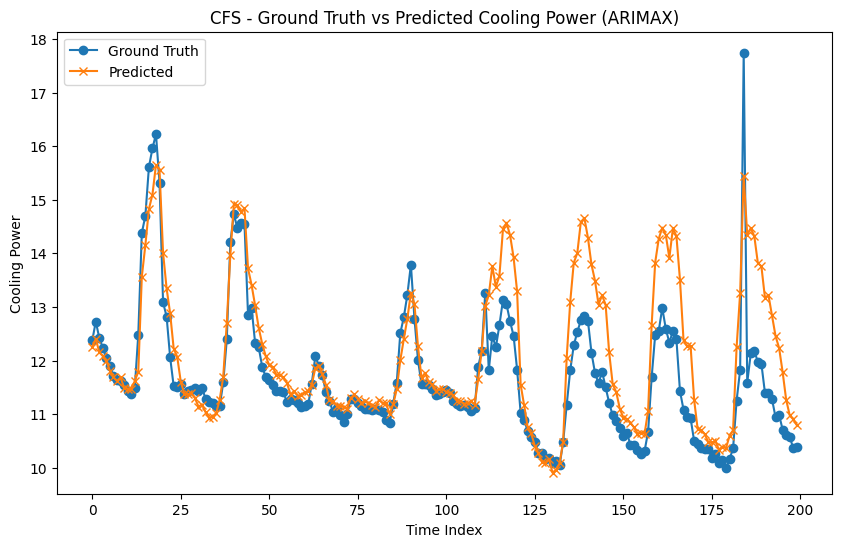

Test MAE: 0.61
Test RMSE: 0.78
Test MAPE: 4.95%


In [ ]:
data = pd.read_csv('./CFS_based_feature.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

SEED = 12
np.random.seed(SEED)

# Set timestamp as index
data.set_index('timestamp', inplace=True)

# Define target and exogenous features
target = data['cooling_power']
exog = data.drop(columns=['cooling_power'])

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

train_end = int(len(data) * train_size)
val_end = train_end + int(len(data) * val_size)

y_train, y_val, y_test = target[:train_end], target[train_end:val_end], target[val_end:]
exog_train, exog_val, exog_test = exog[:train_end], exog[train_end:val_end], exog[val_end:]
ariam_true=0
best_arimax_order=(2,1,3)
if ariam_true==0:
    final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
    model_type = 'ARIMAX'
else:
    final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
    model_type = 'SARIMAX'

final_model_fit = final_model.fit()
#print(exog_test.shape, )
predictions_test = final_model_fit.forecast(steps=len(y_test), exog=exog_test)
# exog_test_aligned = exog_test.loc[y_test.index]
# predictions_test = final_model_fit.predict(
#     start=y_test.index[0],  # Start from the first timestamp in test data
#     end=y_test.index[-1],   # End at the last timestamp in test data
#     exog=exog_test_aligned
# )
#print(predictions_test)

predictions_test_1=predictions_test.reset_index(drop=True)
#print(y_test)
y_test_1=y_test.reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(y_test_1[:200].values, marker='o', label='Ground Truth')
plt.plot(predictions_test_1[:200], marker='x', label='Predicted')
plt.title(f'CFS - Ground Truth vs Predicted Cooling Power ({model_type})')
plt.xlabel('Time Index')
plt.ylabel('Cooling Power')
plt.legend()
plt.show()

# Evaluate final model on test set
test_mae = mean_absolute_error(y_test, predictions_test)
test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

print(f"Test MAE: {test_mae:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")

## Test on different regions

In [ ]:
#######################
## Setting the Model ##
#######################
data = pd.read_csv('./CFS_based_feature.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is datetime

SEED = 12
np.random.seed(SEED)

# Set timestamp as index
data.set_index('timestamp', inplace=True)

# Define target and exogenous features
target = data['cooling_power']
exog = data.drop(columns=['cooling_power'])

# Split the dataset into train, validation, and test sets
train_size = 0.7
val_size = 0.15

train_end = int(len(data) * train_size)
val_end = train_end + int(len(data) * val_size)

y_train, y_val, y_test = target[:train_end], target[train_end:val_end], target[val_end:]
exog_train, exog_val, exog_test = exog[:train_end], exog[train_end:val_end], exog[val_end:]
ariam_true=0

############## Change hyperparameter ###############
best_arimax_order=(1,1,1)
#####################################################

if ariam_true==0:
    final_model = ARIMA(endog=pd.concat([y_train,y_val],axis=0), exog=pd.concat([exog_train,exog_val],axis=0), order=best_arimax_order)
    model_type = 'ARIMAX'
else:
    final_model = SARIMAX(endog=y_train, exog=exog_train, order=best_sarimax_order, seasonal_order=best_sarimax_seasonal_order)
    model_type = 'SARIMAX'

final_model_fit = final_model.fit()
#print(exog_test.shape, )

###############################
## Setting the final dataset ##
###############################
import os

def process_dataset(file_path):
    df=pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])  # Ensure timestamp is datetime


# Set timestamp as index
    df.set_index('timestamp', inplace=True)

# Define target and exogenous features
    target1 = df['cooling_power']
    exog1 = df.drop(columns=['cooling_power'])
    return (target1,exog1)


final_dataset = [process_dataset(x) for x in os.listdir('./final_dataset')]
region = ['Baguio','Bandung','Da Let','Genting']

i=0
for tg,ex in final_dataset:
    predictions_test = final_model_fit.forecast(steps=len(tg), exog=ex)
    predictions_test_1=predictions_test.reset_index(drop=True)
    #print(y_test)
    tg=tg.reset_index(drop=True)
    plt.figure(figsize=(10, 6))
    plt.plot(tg.values, marker='o', label='Ground Truth')
    plt.plot(predictions_test_1, marker='x', label='Predicted')
    plt.title(f'{region[i]} Ground Truth vs Predicted Cooling Power ({model_type})')
    plt.xlabel('Time Index')
    plt.ylabel('Cooling Power')
    plt.legend()
    plt.show()

    # Evaluate final model on test set
    test_mae = mean_absolute_error(y_test, predictions_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))
    test_mape = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

    print(f"{region[i]} Test MAE: {test_mae:.2f}")
    print(f"{region[i]} Test RMSE: {test_rmse:.2f}")
    print(f"{region[i]} Test MSE: {test_rmse**2:.2f}" )
    print(f"{region[i]} Test MAPE: {test_mape:.2f}%")
    i+=1